# Imports

In [4]:
%matplotlib inline
import numpy as np
import csv
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from fatiando import utils, mesher, inversion
from fatiando.gravmag import talwani

# Inputs

In [5]:
# xz plane coordinate system
area = (-100000, 300000, 40000, -1000)

# crust polygon
Cpoly = [[-1000000.0,0.0],
        [0.0,0.0],
        [30000.0,5000.0],
        [70000.0,5000.0],
        [100000.0,3000.0],
        [200000.0,3000.0],
        [210000.0,1000.0],
        [240000.0,1000.0],
        [250000.0,3000.0],
        [1000000.0,3000.0],
        [1000000.0,14000.0],
        [100000.0,14000.0],
        [70000.0,16000.0],
        [30000.0,16000.0],
        [0.0,35000.0],
        [-1000000.0,35000.0]]
Cden = {'density':0.0}

# sediment polygon
Spoly = [[0.0,0.0],
        [50000.0,0.0],
        [60000.0,2000.0],
        [70000.0,0.0],
        [100000.0,3000.0],
        [70000.0,5000.0],
        [30000.0,5000.0]]
Sden = {'density':-400.0}

# water polygon
Wpoly = [[50000.0,0.0],
        [1000000.0,0.0],
        [1000000.0,3000.0],
        [250000.0,3000.0],
        [240000.0,1000.0],
        [210000.0,1000.0],
        [200000.0,3000.0],
        [100000.0,3000.0],
        [70000.0,10.0],
        [60000.0,2000.0]]
Wden = {'density':-400.0}

# mantle polygon
Mpoly = [[0.0,35000.0],
        [30000.0,16000.0],
        [70000.0,16000.0],
        [100000.0,14000.0],
        [1000000.0,14000.0],
        [1000000.0,35000.0]]
Mden = {'density':400.0}

# Doing the Gravity Forward Model Calculation

In [6]:
### setting up multiple polygons... margin model (order is crust, sediment, water, mantle)
PolyDens = [mesher.Polygon(Cpoly,Cden), mesher.Polygon(Spoly,Sden), mesher.Polygon(Wpoly,Wden), mesher.Polygon(Mpoly,Mden)]

### define measurement points and compute gravity
xp = np.arange(-100000.0, 300000.0, 5000.0)
zp = np.zeros_like(xp)
gz = talwani.gz(xp, zp, PolyDens)

# Drawing the Charts

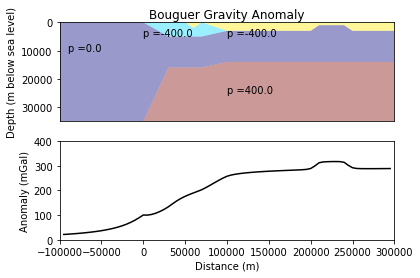

In [24]:
# For experimenting


polys = [Polygon(np.array(Cpoly),True),
         Polygon(np.array(Spoly),True),
         Polygon(np.array(Wpoly),True),
         Polygon(np.array(Mpoly),True)]
p = PatchCollection(polys,cmap=matplotlib.cm.jet, alpha = 0.4)
p.set_array(np.array([100,200,300,400]))                  # setting colours

def drawIt(p,xp,gz):
    fig = plt.figure(0)
    plt.subplot(211)
    plt.title('Bouguer Gravity Anomaly')                 
    plt.axis([-100000,300000,0,35000])
    plt.gca().invert_yaxis()                              
    plt.ylabel('Depth (m below sea level)')              
    fig.gca().set_xticks([])
    fig.gca().add_collection(p)
    plt.text(-90000,10000, 'p =' + str(Cden['density']))
    plt.text(0,5000, 'p =' + str(Sden['density']))
    plt.text(100000,5000, 'p =' + str(Wden['density']))
    plt.text(100000,25000, 'p =' + str(Mden['density']))
    plt.subplot(212)
    plt.axis([-100000,300000,0,400])
    plt.plot(xp, gz, 'k')
    plt.ylabel('Anomaly (mGal)')                           
    plt.xlabel('Distance (m)')                             
    fig.show();

drawIt(p,xp,gz)

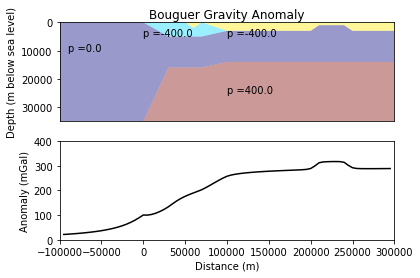

In [9]:
polys = [Polygon(np.array(Cpoly),True),
         Polygon(np.array(Spoly),True),
         Polygon(np.array(Wpoly),True),
         Polygon(np.array(Mpoly),True)]
p = PatchCollection(polys,cmap=matplotlib.cm.jet, alpha = 0.4)

# setting colours
p.set_array(np.array([100,200,300,400]))

fig = plt.figure(0)
ax1 = plt.subplot(211)
plt.title('Bouguer Gravity Anomaly')
plt.axis([-100000,300000,0,35000])
plt.gca().invert_yaxis()
plt.ylabel('Depth (m below sea level)')
ax1.set_xticks([])
ax1.add_collection(p)
plt.text(-90000,10000, 'p =' + str(Cden['density']))
plt.text(0,5000, 'p =' + str(Sden['density']))
plt.text(100000,5000, 'p =' + str(Wden['density']))
plt.text(100000,25000, 'p =' + str(Mden['density']))
ax2 = plt.subplot(212)
plt.axis([-100000,300000,0,400])
ax2.plot(xp, gz, 'k')
plt.ylabel('Anomaly (mGal)')
plt.xlabel('Distance (m)')
plt.show();

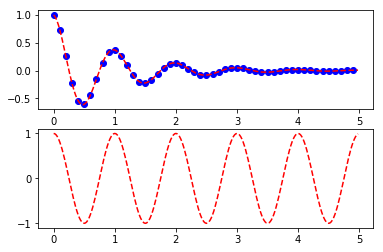

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure()
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'r--')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

In [11]:
def changeToHeights(depths):
    depthNP = np.array(depths)
    return np.stack((depthNP[:,0],(depthNP[:,1] * -1.0)), axis=1)